Dependencies you needed:

1- numpy, scipy, matplotlib
```bash
sudo pip install scipy numpy matplotlib
```

2- OpenCV2
```bash
sudo apt-get install libopencv-dev python-opencv
```

And I am using Python 2.7, pip for package management. For Windows, installing opencv a bit complicated, anyway you can google about it.

In [1]:
# import dependencies we needed
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# no need to call matplotlib again and again to use matplotlib function
%matplotlib inline

('This image is:', <type 'numpy.ndarray'>, 'with dimension:', (540, 960, 3))


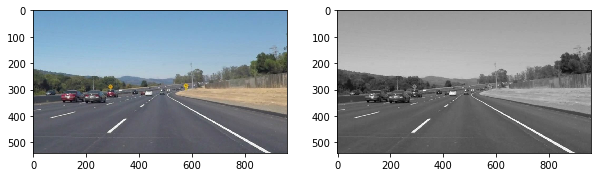

In [2]:
# reading in an image
image = mpimg.imread('test_images/solidWhiteCurve.jpg')

# printing out some stats and plotting
print('This image is:', type(image), 'with dimension:', image.shape)

plt.figure(figsize = (10, 10))

# this will print normal image
plt.subplot(1, 2, 1)
plt.imshow(image)

# this will print gray image
plt.subplot(1, 2, 2)
# simply mean our image on Z index
plt.imshow(np.mean(image, axis = 2), cmap = 'gray')

plt.show()

Below is function from the Udacity class, I probably just reused it for entire notebook

We are using OpenCV2 API for apply grayscale, canny edge detection, gaussian blur, and drawing lines on our picture

In [3]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color = [255, 0, 0], thickness = 2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength = min_line_len, maxLineGap = max_line_gap)
    line_img = np.zeros(img.shape, dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

def weighted_img(img, initial_img, alpha = 0.8, beta = 1., gamma = 0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, alpha, img, beta, gamma)

Let try visualize some of our functions

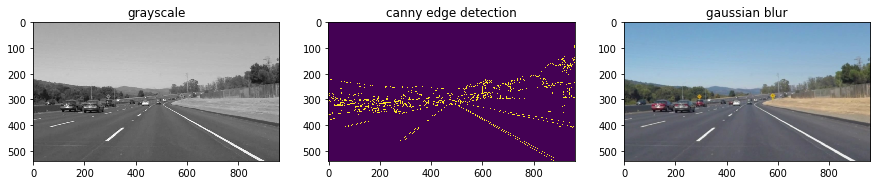

In [4]:
plt.figure(figsize = (15, 15))

plt.subplot(1, 3, 1)
plt.imshow(grayscale(image), cmap = 'gray')
plt.title('grayscale')

plt.subplot(1, 3, 2)
plt.imshow(canny(image, 50, 150))
plt.title('canny edge detection')

plt.subplot(1, 3, 3)
plt.imshow(gaussian_blur(image, 5))
plt.title('gaussian blur')

plt.show()

first picture is a normal grayscale, if you have RGB image (300, 300, 3), it just mean for Z index become (300, 300, 1)

second picture is canny edge detection. First it apply gaussian equation.
![alt text](http://magnisci.com/images/Blog/computervision/correcting-illumination/gaussian-function.jpg)

By i as our low boundary = 50, j as high boundary = 150
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4a36d7f727beeaff58352d671bb41a3aca9f44d6)

third picture is gaussian blur. simply calculated 5x5 gaussian filter because we choose 5 for gaussian function parameter

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/efce20969e243d1ba3f34c2f7126041095bd4656)

You dont see any much different for third picture from the original one. you can increase the value if you want see more blur effect

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in divide


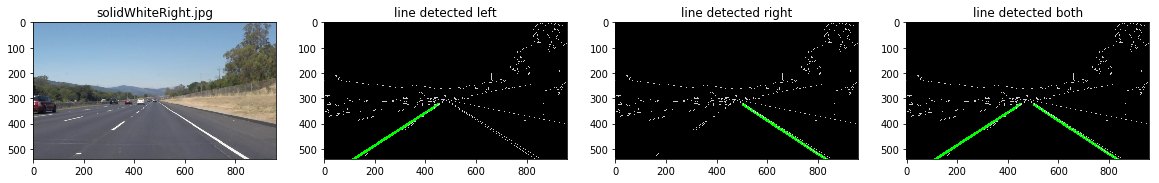

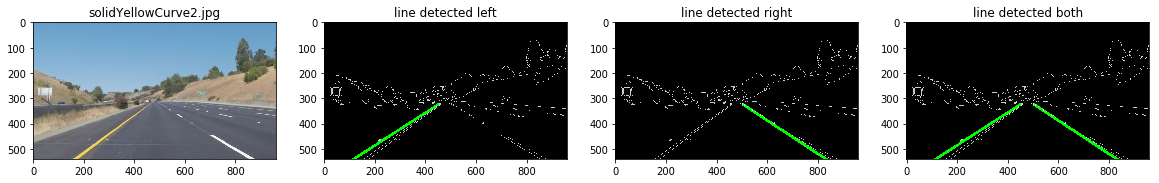

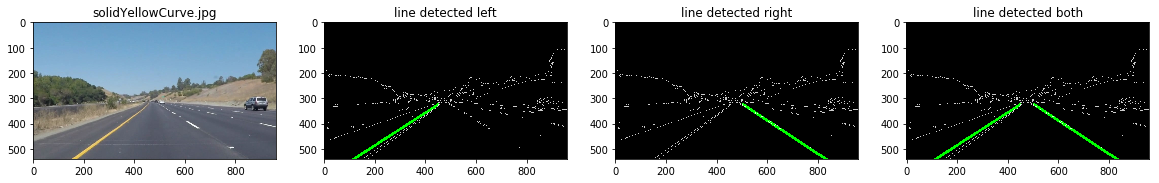

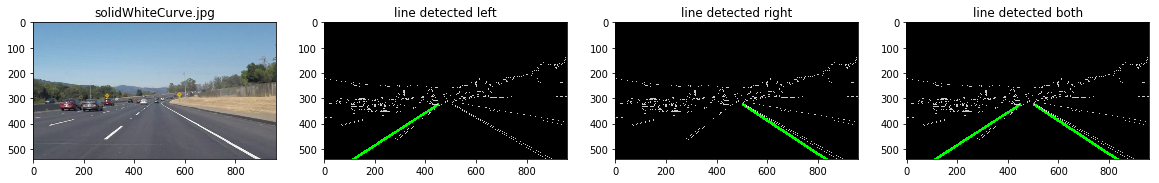

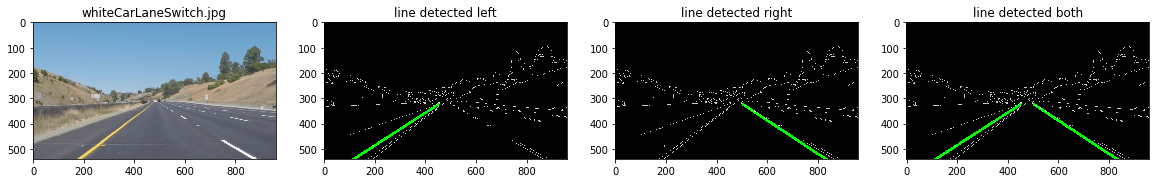

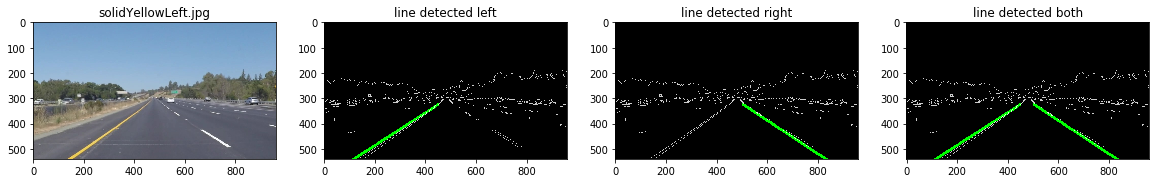

In [5]:
import os
from numpy import arange 

imgs = os.listdir("test_images/")

# generate [1, 4.. 4 * len(imgs), skip by 4]
first_col = arange(1, 4 * len(imgs), 4)
second_col = first_col + 1
third_col = second_col + 1
fourth_col = third_col + 1

# initial apexs Left and Right settings 
ApexLeftX = 450
ApexLeftY = 325
ApexRightX = 505
ApexRightY = 324
ApexLeft = []
ApexRight = []
Delta = 1000

# Read in and grayscale the image
# Note: in the previous example we were reading a .jpg 
# Here we read a .png and convert to 0,255 bytescale
# image = (mpimg.imread('solidWhiteRight.jpg')*255).astype('uint8')
i = 0
for line in imgs:
    #print('test_images/'+img_list[3])
    image = mpimg.imread('test_images/'+imgs[i])
    #image = mpimg.imread(dirlist[i])
    gray = grayscale(image)

    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = gaussian_blur(gray,kernel_size)

    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = canny(blur_gray, low_threshold, high_threshold)

    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    
    vertices = np.array([[(20,imshape[0]),(490,int(0.6 * imshape[0])), (500, int(0.6 * imshape[0])), (imshape[1]-20,imshape[0])]], dtype=np.int32)
    
    masked_edges = region_of_interest(edges, vertices)
    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi / 180 # angular resolution in radians of the Hough grid
    threshold = 10     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 30 #minimum number of pixels making up a line
    max_line_gap = 8    # maximum gap in pixels between connectable line segments
    
    # multiply with 0 to make it blackscale
    line_image = np.copy(image) * 0
    line_imagesecond = np.copy(image) * 0
    line_imagethird = np.copy(image) * 0

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
    #print(lines)
    # Iterate over the output "lines" and draw lines on a blank image
    slope = []

    for line in lines:
        for x1,y1,x2,y2 in line:
            slope.append((y2 - y1) / (x2 - x1))
            if x1 < ApexLeftX:
                ApexLeft.append([x1, y1])
                ApexLeft.append([x2, y2])
            if x1 > ApexRightX:
                ApexRight.append([x1, y1])
                ApexRight.append([x2, y2])
    
    
    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((edges, edges, edges)) 
    
    BottomLeftX, BottomRightX = int(ApexLeftX + Delta / min(slope)), int(ApexRightX + Delta / max(slope))
    
    cv2.line(line_image,(ApexLeftX, ApexLeftY),(BottomLeftX * 2, ApexLeftY + Delta), (0, 255, 0), 10)
    
    lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)

    #for line in img_list:
    fig, ax = plt.subplots(figsize = (20, 20))
    
    plt.subplot(len(imgs), 4, first_col[i])
    plt.title(imgs[i])
    plt.imshow(image)

    
    plt.subplot(len(imgs), 4, second_col[i])
    plt.title('line detected left')
    plt.imshow(lines_edges)
    
    cv2.line(line_imagesecond,(ApexRightX, ApexRightY),(BottomRightX * 4, ApexRightY + Delta), (0, 255, 0), 10)
    lines_edges_second = cv2.addWeighted(color_edges, 0.8, line_imagesecond, 1, 0)
    
    plt.subplot(len(imgs), 4, third_col[i])
    plt.title('line detected right')
    plt.imshow(lines_edges_second)
    
    cv2.line(line_imagethird,(ApexLeftX, ApexLeftY),(BottomLeftX * 2, ApexLeftY + Delta), (0, 255, 0), 10)
    cv2.line(line_imagethird,(ApexRightX, ApexRightY),(BottomRightX * 4, ApexRightY + Delta), (0, 255, 0), 10)
    lines_edges_third = cv2.addWeighted(color_edges, 0.8, line_imagethird, 1, 0)
    
    plt.subplot(len(imgs), 4, fourth_col[i])
    plt.title('line detected both')
    plt.imshow(lines_edges_third)
    
    
    i += 1

In [6]:
from IPython.display import HTML
from moviepy.editor import VideoFileClip

In [7]:
def process_image_left(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    gray = grayscale(image)
    # blue,green,red = cv2.split(image)
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = gaussian_blur(gray,kernel_size)

    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = canny(blur_gray, low_threshold, high_threshold)

    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(20,imshape[0]),(490,int(0.6 * imshape[0])), (500, int(0.6 * imshape[0])), (imshape[1]-20,imshape[0])]], dtype=np.int32)

    #cv2.fillPoly(mask, vertices, ignore_mask_color)
    #masked_edges = cv2.bitwise_and(edges, mask)
    masked_edges = region_of_interest(edges, vertices)
    
    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 10     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 30 #minimum number of pixels making up a line
    max_line_gap = 8    # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

    # Iterate over the output "lines" and draw lines on a blank image
    slope = [-0.724,0.6]

    for line in lines:
        for x1,y1,x2,y2 in line:
            slope.append((y2-y1)/(x2-x1))

    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((edges, edges, edges)) 
    
    # Draw the lines on the edge image
    # print (max(slope), min(slope))
    BottomLeftX = int(ApexLeftX + Delta/min(slope))

    cv2.line(image,(ApexLeftX, ApexLeftY),(BottomLeftX * 2, ApexLeftY + Delta),(255, 0, 0), 10)
    lines_edges = cv2.addWeighted(color_edges, 0.8, image, 1, 0)
    return image

In [8]:
white_output = 'testwhite_left.mp4'
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")

white_clip = clip1.fl_image(process_image_left)
%time white_clip.write_videofile(white_output, audio = False)

[MoviePy] >>>> Building video testwhite_left.mp4
[MoviePy] Writing video testwhite_left.mp4


100%|█████████▉| 221/222 [00:02<00:00, 74.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: testwhite_left.mp4 

CPU times: user 2.53 s, sys: 288 ms, total: 2.82 s
Wall time: 3.3 s


In [9]:
HTML("""
<video width="450" height="250" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [10]:
def process_image_right(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    gray = grayscale(image)
    # blue,green,red = cv2.split(image)
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = gaussian_blur(gray,kernel_size)

    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = canny(blur_gray, low_threshold, high_threshold)

    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(20,imshape[0]),(490,int(0.6 * imshape[0])), (500, int(0.6 * imshape[0])), (imshape[1]-20,imshape[0])]], dtype=np.int32)

    #cv2.fillPoly(mask, vertices, ignore_mask_color)
    #masked_edges = cv2.bitwise_and(edges, mask)
    masked_edges = region_of_interest(edges, vertices)
    
    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 10     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 30 #minimum number of pixels making up a line
    max_line_gap = 8    # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

    # Iterate over the output "lines" and draw lines on a blank image
    slope = [-0.724,0.6]

    for line in lines:
        for x1,y1,x2,y2 in line:
            slope.append((y2-y1)/(x2-x1))

    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((edges, edges, edges)) 
    
    # Draw the lines on the edge image
    # print (max(slope), min(slope))
    BottomRightX = int(ApexRightX + Delta/max(slope))

    cv2.line(image,(ApexRightX, ApexRightY),(BottomRightX, ApexRightY + Delta), (255, 0, 0), 10)
    lines_edges = cv2.addWeighted(color_edges, 0.8, image, 1, 0)
    return image

In [11]:
white_output = 'testwhite_right.mp4'
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")

white_clip = clip1.fl_image(process_image_right)
%time white_clip.write_videofile(white_output, audio = False)

[MoviePy] >>>> Building video testwhite_right.mp4
[MoviePy] Writing video testwhite_right.mp4


100%|█████████▉| 221/222 [00:02<00:00, 69.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: testwhite_right.mp4 

CPU times: user 2.62 s, sys: 216 ms, total: 2.84 s
Wall time: 3.39 s


In [12]:
HTML("""
<video width="450" height="250" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [13]:
def process_image_both(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    gray = grayscale(image)
    # blue,green,red = cv2.split(image)
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = gaussian_blur(gray,kernel_size)

    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = canny(blur_gray, low_threshold, high_threshold)

    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(20,imshape[0]),(490,int(0.6 * imshape[0])), (500, int(0.6 * imshape[0])), (imshape[1]-20,imshape[0])]], dtype=np.int32)

    #cv2.fillPoly(mask, vertices, ignore_mask_color)
    #masked_edges = cv2.bitwise_and(edges, mask)
    masked_edges = region_of_interest(edges, vertices)
    
    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 10     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 30 #minimum number of pixels making up a line
    max_line_gap = 8    # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

    # Iterate over the output "lines" and draw lines on a blank image
    slope = [-0.724,0.6]

    for line in lines:
        for x1,y1,x2,y2 in line:
            slope.append((y2-y1)/(x2-x1))

    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((edges, edges, edges)) 
    
    # Draw the lines on the edge image
    BottomLeftX, BottomRightX = int(ApexLeftX + Delta / min(slope)), int(ApexRightX + Delta / max(slope))
    
    cv2.line(image,(ApexLeftX, ApexLeftY),(int(BottomLeftX * 1.5), ApexLeftY + Delta),(255, 0, 0), 10)
    cv2.line(image,(ApexRightX, ApexRightY),(BottomRightX, ApexRightY + Delta), (255, 0, 0), 10)
    lines_edges = cv2.addWeighted(color_edges, 0.8, image, 1, 0)
    return image

In [14]:
white_output = 'testwhite_both.mp4'
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")

white_clip = clip1.fl_image(process_image_both)
%time white_clip.write_videofile(white_output, audio = False)

[MoviePy] >>>> Building video testwhite_both.mp4
[MoviePy] Writing video testwhite_both.mp4


100%|█████████▉| 221/222 [00:03<00:00, 72.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: testwhite_both.mp4 

CPU times: user 2.65 s, sys: 264 ms, total: 2.91 s
Wall time: 3.47 s


In [15]:
HTML("""
<video width="450" height="250" controls>
  <source src="{0}">
</video>
""".format(white_output))